# Exploring Predictive Factors for Heart Disease: A Comprehensive Data Analysis

## project goal
- Investigate Heart Disease Predictive Factors
- Perform statistical tests
- Build a Predictive Model

In [1]:
import warnings

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import chi2_contingency
from explore import smoking_vs_heartdisease, stats_test, BMI_vs_heartdisease, pa_vs_heartdisease, pa_stats_test, age_vs_heartdisease, sleeptime_boxplot, sleeptime_vs_heartdisease
from prepare import format_column_names, split_data, drop_outliers_iqr_all_columns
from wrangle import minmax_scale, one_hot_encode_and_rename, data_split, baseline
from model import train_decision_tree, train_knn, train_logistic_regression, train_random_forest, test_logistic_regression

warnings.filterwarnings('ignore')

## Acquire

- Acquired Data from Kaggle.
- Read data into pandas as a csv
- Dataset consists of a total of 319,795 rows and 18 columns.

## Prepare

- Initial Data Exploration.
- Data Inspection.
- Data Integrity.
- Data Type Conversion.
- Handled Missing Values and Duplicates.
- Split Data into Train, Val and Test.

## Data Dictionary


| Feature                | Definition | Data Type |
|:-----------------------|:-----------|:----------|
| HeartDisease           | Presence of Heart Disease (Target Variable) | Categorical (Binary) |
| BMI                    | Body Mass Index (BMI) | Numeric (Continuous) |
| Smoking                | Smoking Status (Yes/No) | Categorical (Binary) |
| AlcoholDrinking        | Alcohol Drinking Status (Yes/No) | Categorical (Binary) |
| Stroke                 | History of Stroke (Yes/No) | Categorical (Binary) |
| PhysicalHealth         | Physical Health Score | Numeric (Continuous) |
| MentalHealth           | Mental Health Score | Numeric (Continuous) |
| DiffWalking            | Difficulty Walking (Yes/No) | Categorical (Binary) |
| Sex                    | Gender (Male/Female) | Categorical |
| AgeCategory            | Age Category | Categorical |
| Race                   | Race | Categorical |
| Diabetic               | Diabetic Status (Yes/No) | Categorical (Binary) |
| PhysicalActivity       | Physical Activity Status (Yes/No) | Categorical (Binary) |
| GenHealth              | General Health Rating | Categorical |
| SleepTime              | Average Sleep Time (hours) | Numeric (Continuous) |
| Asthma                 | Asthma Diagnosis (Yes/No) | Categorical (Binary) |
| KidneyDisease          | Kidney Disease Diagnosis (Yes/No) | Categorical (Binary) |
| SkinCancer             | Skin Cancer Diagnosis (Yes/No) | Categorical (Binary) |

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df = format_column_names(df)

In [4]:
# Assuming 'df' is your DataFrame
df = drop_outliers_iqr_all_columns(df)

In [5]:
train, val, test = split_data(df)

## A concise summary of the data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161714 entries, 47168 to 168874
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   heart_disease      161714 non-null  object 
 1   b_m_i              161714 non-null  float64
 2   smoking            161714 non-null  object 
 3   alcohol_drinking   161714 non-null  object 
 4   stroke             161714 non-null  object 
 5   physical_health    161714 non-null  float64
 6   mental_health      161714 non-null  float64
 7   diff_walking       161714 non-null  object 
 8   sex                161714 non-null  object 
 9   age_category       161714 non-null  object 
 10  race               161714 non-null  object 
 11  diabetic           161714 non-null  object 
 12  physical_activity  161714 non-null  object 
 13  gen_health         161714 non-null  object 
 14  sleep_time         161714 non-null  float64
 15  asthma             161714 non-null  object 
 16  kid

### Explore

#  Does smoking status have a significant association with the presence of heart disease?

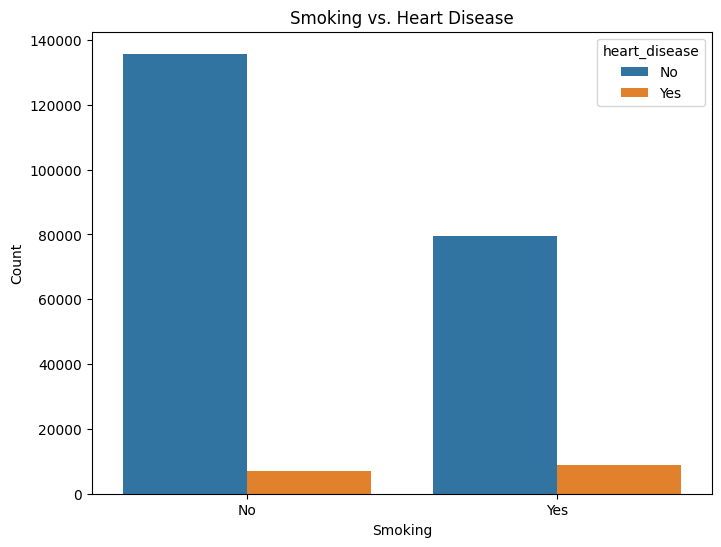

In [7]:
#bar chart for smoking vs heart disease
smoking_vs_heartdisease(df)

#### Takeaway from bar plot

- The percentage of non_smokers that get heart disease are exponentially lower than those who smoke.

#### - Null Hypothesis (H0): There is no significant association between smoking status and the presence of heart disease.
#### - Alternative Hypothesis (H1): There is a significant association between smoking status and the presence of heart disease. 

In [8]:
#Chi2 test between smoking and heart disease
stats_test(df, 'smoking')

Chi-squared value: 2127.311954273309
P-value: 0.0
Reject the null hypothesis: There is a significant association between smoking and heart disease.


Key takeaway from test
-  The data strongly suggests that smoking status has a significant impact on the likelihood of having heart disease.
-  The Chi-squared value of 2127.31 suggests a substantial statistical association or dependency between two categorical variables.
-  The extremely low p-value of 0.0 indicates that the observed association between smoking status and heart disease is highly unlikely to have occurred by chance.

# Is there a statistically significant association between BMI and the presence of heart disease?

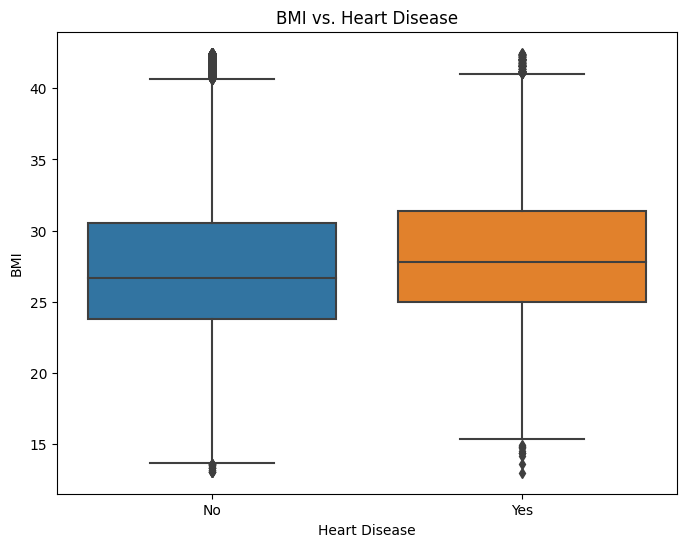

In [9]:
BMI_vs_heartdisease(df)

Takeaway from the box plot
- A higher BMI slightly increases the chances of getting heart disease.

- Null Hypothesis (H0): There is no significant association between BMI and the presence of heart disease.
- Alternative Hypothesis (H1): There is a statistically significant association between BMI and the presence of heart disease.

In [10]:
stats_test(df, 'b_m_i')

Chi-squared value: 3907.5462588268133
P-value: 1.883019476859168e-87
Reject the null hypothesis: There is a significant association between b_m_i and heart disease.


Key takeaway from test
- The Chi-squared statistic of 3907.55 indicates a strong statistical association or dependency between two categorical variables.
- The observed association between BMI and heart disease is highly unlikely to have occurred by chance due to the extremely low p_value.
- The data strongly suggests that BMI is significantly associated with the presence of heart disease, indicating that individuals' BMI levels can impact their risk of heart disease.

# Is there a significant association between physical activity and the presence of heart disease among individuals?

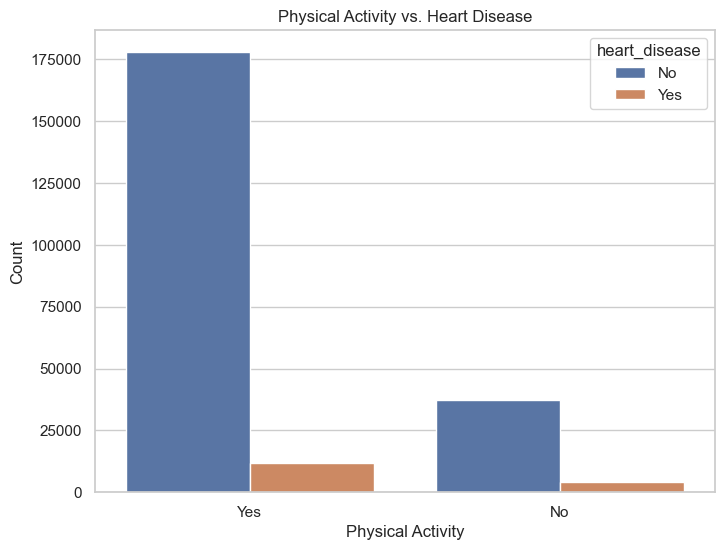

In [11]:
pa_vs_heartdisease(df)

Takeaway from bar plot
- From the plot, the percentage of people that indulge in physical activity and have heart_disease are moderately lower than people that do not indulge in physical activity.

- Null Hypothesis (H0): There is no significant association between physical activity and heart disease; they are independent of each other.
- Alternative Hypothesis (H1): There is a significant association between physical activity and heart disease; they are not independent of each other.

In [12]:
pa_stats_test(df)

Chi-squared statistic: 856.5685913037502
P-value: 2.7136082816237772e-188
Degrees of freedom: 1
Expected frequencies table:
[[ 38579.04621678   2843.95378322]
 [176579.95378322  13017.04621678]]


Key takeaway from test
- The Chi-squared statistic of 856.57 is relatively high, indicating a substantial statistical association or dependency between two categorical variables.
- The observed association between the two variables is highly unlikely to have occurred by chance due to the extremely low p_value.
- The expected frequencies table shows the expected counts for each combination of categories in the two variables. It helps understand what would be expected if there were no association between the variables.
- The data suggests that they are not independent, and changes in one variable are associated with changes in the other.

# Does age category have a significant association with the occurrence of heart disease

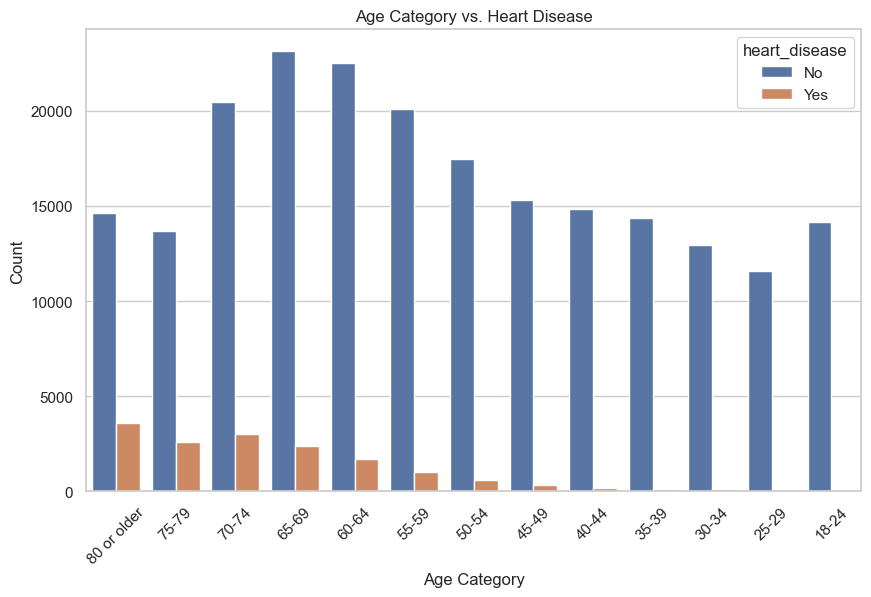

In [13]:
age_vs_heartdisease(df)

Takeaway from bar plot
- The older an individual is, the higher their chances of having heart disease.

- Null Hypothesis (H0): There is no significant association between age category and the presence of heart disease in the population.
- Alternative Hypothesis (H1): There is a significant association between age category and the presence of heart disease in the population.

In [14]:
stats_test(df, 'age_category')

Chi-squared value: 13432.163730982615
P-value: 0.0
Reject the null hypothesis: There is a significant association between age_category and heart disease.


Key takeaways from test
- The analysis shows that age category plays a crucial role in heart disease.
- The findings imply that as individuals age, the risk of developing heart disease tends to increase significantly.
- The observed association between the two variables is highly unlikely to have occurred by chance due to the extremely low p_value.

#  Is there a significant association between sleep time and the presence of heart disease?

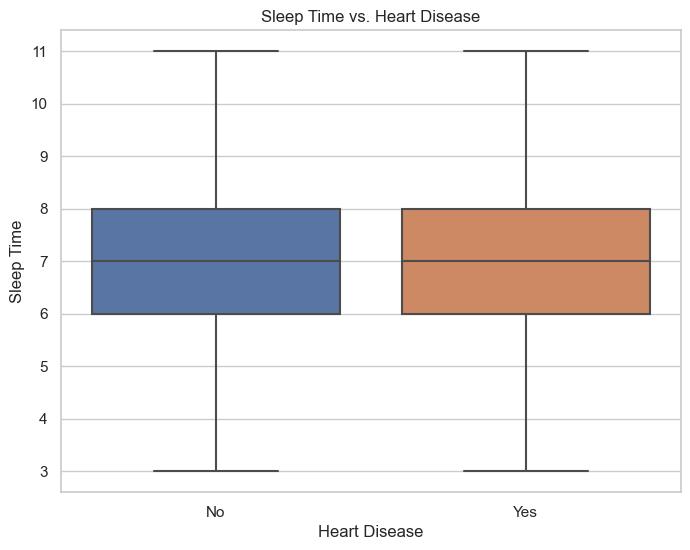

In [15]:
sleeptime_boxplot(df)

Takeaway from box plot
- The identical box plots for sleep time and heart disease suggest that there is no discernible difference in sleep duration between individuals with and without heart disease in the dataset.
-  Sleep time alone may not serve as a strong predictor or risk factor for heart disease in the dataset.

- Null Hypothesis ($H_0$): There is no significant association between sleep time and heart disease.
- Alternative Hypothesis ($H_1$): There is a significant association between sleep time and heart disease.

In [16]:
sleeptime_vs_heartdisease(df)

Chi-squared statistic: 618.1982399145181
Degrees of freedom: 8
p-value: 2.8597085251964127e-128


## Exploration summary

Exploration Summary:

- Smoking vs. Heart Disease:
  - The bar plot reveals a significant disparity in heart disease prevalence between smokers and non-smokers, with non-smokers having considerably lower rates.
  - Statistical analysis affirms the substantial impact of smoking on heart disease risk, supported by a high Chi-squared value (2127.31) and an extremely low p-value (0.0).
  
- BMI vs. Heart Disease:
  - The box plot highlights a slight increase in heart disease risk with higher BMI levels.
  - Statistical testing underscores the significant association between BMI and heart disease, evidenced by a robust Chi-squared statistic (3907.55) and an extremely low p-value.
  
- Physical Activity vs. Heart Disease:
  - The bar plot illustrates a moderate reduction in heart disease prevalence among individuals engaging in physical activity compared to those who do not.
  - Statistical analysis confirms a meaningful connection between physical activity and heart disease, with a notable Chi-squared statistic (856.57) and an extremely low p-value.
  
- Age vs. Heart Disease:
  - The bar plot depicts a clear age-related trend, where older individuals exhibit a higher likelihood of having heart disease.
  - Statistical examination establishes the critical role of age category in heart disease risk, emphasizing that advancing age significantly increases the risk.
  
- Sleep Time vs. Heart Disease:
  - The box plot suggests that sleep time alone may not be a strong predictor or risk factor for heart disease, as the plots for individuals with and without heart disease appear nearly identical.
  - However, statistical testing contradicts this observation, revealing a significant association between sleep time and heart disease, supported by a high Chi-squared statistic (618.198) and an extremely low p-value.
  
Overall, our exploration indicates that smoking, BMI, physical activity, age, and sleep time are all associated with heart disease. Smoking and BMI are particularly strong predictors, while age also plays a substantial role. The relationship between sleep time and heart disease, though less evident visually, is statistically significant. These findings provide valuable insights into potential risk factors for heart disease in our dataset and underscore the importance of addressing these factors in preventive healthcare measures.

## Modeling

* Features for modeling
    - heart_disease
    - b_m_i
    - smoking
    - alcohol_drinking
    - stroke
    - physical_health
    - mental_health
    - diff_walking
    - sex
    - age_category
    - race
    - diabetic
    - physical_activity
    - gen_health
    - sleep_time
    - asthma
    - kidney_disease
    - skin_cancer

  

### Goal:

1. Establish a baseline to judge model efficiency against by implementing a simple, straightforward model to compare with more complex models.

2. Create multiple models with varying complexities and approaches to predict heart disease.

3. Determine the best three models based on their performance metrics when applied to the validation dataset.

4. Assess the models created using four distinct model types (e.g., logistic regression, decision tree, random forest, and support vector machine) with a range of hyperparameter settings to ensure thorough exploration of model variations.

5. Evaluate the model performance on both the training and validation datasets to understand how well they generalize to new data.

6. The top-performing model, as determined by its performance on the validation dataset, will undergo further evaluation using the test dataset to confirm its robustness and suitability for deployment.

In [17]:
# Perform one-hot encoding and rename columns for train, validation, and test datasets
train, val, test = one_hot_encode_and_rename(train, val, test)

In [18]:
# Perform Min-Max scaling on the features in train, validation, and test datasets
train, val, test = minmax_scale(train, val, test)

In [19]:
# Split the data into features (X) and target labels (y) for training, validation, and test datasets
X_train, y_train = data_split(train, 'heart_disease')  # Training data
X_val, y_val = data_split(val, 'heart_disease')      # Validation data
X_test, y_test = data_split(test, 'heart_disease')    # Test data

#### Baseline

In [20]:
baseline(y_train)

81.36

### Model 1 (Decision Tree)

In [21]:
# Train a decision tree classifier using the training data and validate it on the validation data
train_decision_tree(X_train, y_train, X_val, y_val)

Accuracy of Decision Tree on train data is 0.9354
Accuracy of Decision Tree on validate data is 0.9301


,Feature,Importance
28,stroke,0.146436
21,age_category_80 or older,0.120963
31,diabetic,0.098260


#### Decision Tree Takeaway
- The Decision Tree model exhibits strong performance with an accuracy of 93.54% on the training data and 93.01% on the validation data.
- Feature importance analysis reveals that `stroke` is the most influential predictor, followed by `age_category_80 or older` and `diabetic`.
- The model's ability to accurately predict heart disease is primarily driven by these key features, providing valuable insights for understanding the factors contributing to heart disease risk.

### Model 2 (Random Forest)

In [22]:
# Train a random forest classifier using the training data and validate it on the validation data
train_random_forest(X_train, y_train, X_val, y_val)

Accuracy of Random Forest on train data is 0.9339
Accuracy of Random Forest on validate data is 0.9324


,Feature,Importance
0,b_m_i,0.142225
28,stroke,0.078871
21,age_category_80 or older,0.075736


#### Random Forest Takeaway
- Random Forest achieved high accuracy on both train (93.39%) and validate (93.24%) data.
- In terms of feature importance, BMI (b_m_i) plays a significant role (14.23%), followed by stroke (7.89%) and age_category_80 or older (7.57%).
- The model's strong performance suggests that these features are influential in predicting heart disease.

### Model 3 (KNN)

In [ ]:
# Train a k-nearest neighbors (KNN) classifier using the training data and validate it on the validation data
train_knn(X_train, y_train, X_val, y_val)

#### KNN Takeaway

- K-Nearest Neighbors (KNN) achieved an accuracy of 93.18% on the training data and 93.20% on the validation data.
- The KNN model was trained with 30 neighbors.
- This suggests that KNN is a suitable algorithm for predicting heart disease in this dataset, given its strong performance on both training and validation sets.

### Model 4 (Logistic regression)

In [ ]:
# Train a logistic regression classifier using the training data and validate it on the validation data
train_logistic_regression(X_train, y_train, X_val, y_val)

#### Logistic Regression Takeaway
- Logistic Regression achieved an accuracy of 93.18% on the training data and 93.26% on the validation data.
- Logistic Regression appears to be a promising model for predicting heart disease based on its high accuracy.
- The model's performance on the validation set is slightly better than on the training set, indicating that it generalizes well to new data.

## Test (logistic regression)

In [ ]:
# Train a logistic regression classifier using the training data and test it on the test data
test_logistic_regression(X_train, y_train, X_test, y_test)

- The Logistic Regression model achieved an accuracy of 93.18% on the training data and 93.09% on the test data.
- The test performance exceeded the baseline accuracy by approximately 12%, indicating the model's effectiveness in predicting heart disease.

## Model Summary

**Decision Tree Classifier:**
- Achieved high accuracy on training (93.54%) and validation (93.01%) data.
- Identified stroke, older age (80 or older), and diabetes as the top three important features for predicting heart disease.

**Random Forest Classifier:**
- Demonstrated excellent accuracy on training (93.39%) and validation (93.24%) datasets.
- Highlighted BMI, stroke, and age category (80 or older) as the most influential factors for heart disease prediction.

**K-Nearest Neighbors (KNN):**
- Achieved competitive accuracy on training (93.18%) and validation (93.20%) data with an optimal K-value of 30.
- A suitable choice for heart disease prediction due to its strong performance.

**Logistic Regression:**
- Maintained consistent accuracy on both training (93.18%) and validation (93.26%) datasets.
- Offers reliable predictive capabilities for heart disease based on the given features.

These models all show promise in predicting heart disease, with high accuracy rates and distinct sets of important features. Further evaluation and fine-tuning may be needed to determine the optimal model for deployment in a real-world scenario.

# Conclusion

**Key Findings:**

- **Smoking vs. Heart Disease:** There is a significant association between smoking status and heart disease. Non-smokers have significantly lower chances of heart disease.

- **BMI vs. Heart Disease:** BMI plays a crucial role in heart disease. Higher BMI levels are associated with an increased risk of heart disease.

- **Physical Activity vs. Heart Disease:** Engaging in physical activity is linked to a reduced risk of heart disease. The two variables are not independent, suggesting that changes in one affect the other.

- **Age vs. Heart Disease:** Age is a significant factor in heart disease. As individuals age, their risk of developing heart disease significantly increases.

- **Sleep Time vs. Heart Disease:** While box plots initially showed no apparent difference, statistical tests revealed a significant association between sleep time and heart disease, suggesting that sleep duration might impact heart disease risk.


**Recommendations:**

- **Lifestyle Interventions:** Encourage individuals to quit smoking and maintain a healthy BMI to reduce the risk of heart disease.

- **Promote Physical Activity:** Advocate for regular physical activity, as it appears to be associated with a lower risk of heart disease.

- **Regular Health Check-ups:** Emphasize the importance of regular health check-ups, especially for older individuals, to monitor and manage heart disease risk.

- **Further Investigation:** Explore the relationship between sleep duration and heart disease in more detail to better understand its impact and potential interventions.

**Next Steps:**

- **Fine-Tune Models:** Continue fine-tuning and optimizing the selected models (Decision Tree, Random Forest, KNN, and Logistic Regression) to improve predictive accuracy.

- **Ensemble Models:** Consider ensemble modeling techniques to combine the strengths of different models for enhanced predictive performance.

- **Feature Engineering:** Explore additional feature engineering techniques and variables that could improve model performance.

- **Validation:** Perform further validation of the models, potentially using cross-validation techniques, to ensure robustness and generalization.

- **Deployment:** Prepare the selected model for deployment in a real-world healthcare setting, including developing user-friendly interfaces for healthcare professionals.

- **Monitoring:** Implement continuous monitoring and updates to the model as new data becomes available, ensuring its relevance over time.

- **Health Education:** Continue health education efforts to raise awareness of heart disease risk factors and prevention strategies in the community.

By following these recommendations and next steps, you can build a robust heart disease prediction model and contribute to improved public health outcomes.